# Customer Churn Analysis

# Problem Statement:


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.


You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score,plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [2]:
df = pd.read_csv("https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above observations i can conclude that there are no null values present and the TotalCharges column can be float. so we have to typecast this column and can drop customerID

In [4]:
df = df.drop('customerID',axis=1)

In [5]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [6]:
# checking null value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [8]:
#Extracting numerical and categorical features
numerical = list(df.select_dtypes(include=['int64','float64']).keys())
categorical = list(df.select_dtypes(include='O').keys())
print(categorical)
print(numerical)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [9]:
# value_counts of the categorical columns
for i in categorical:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [10]:
#Replace 'No' data in InternetService feature to 'No internet service' as it creates confusion with 'No' value what we replaced for other categorical features
df.InternetService = df.InternetService.replace('No','No internet service')
#we will convert Yes = 1 and No = 0
for i in categorical:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [11]:
le = LabelEncoder()
df['InternetService'] = le.fit_transform(df['InternetService'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [13]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Looks like all the data flaws are fixed now

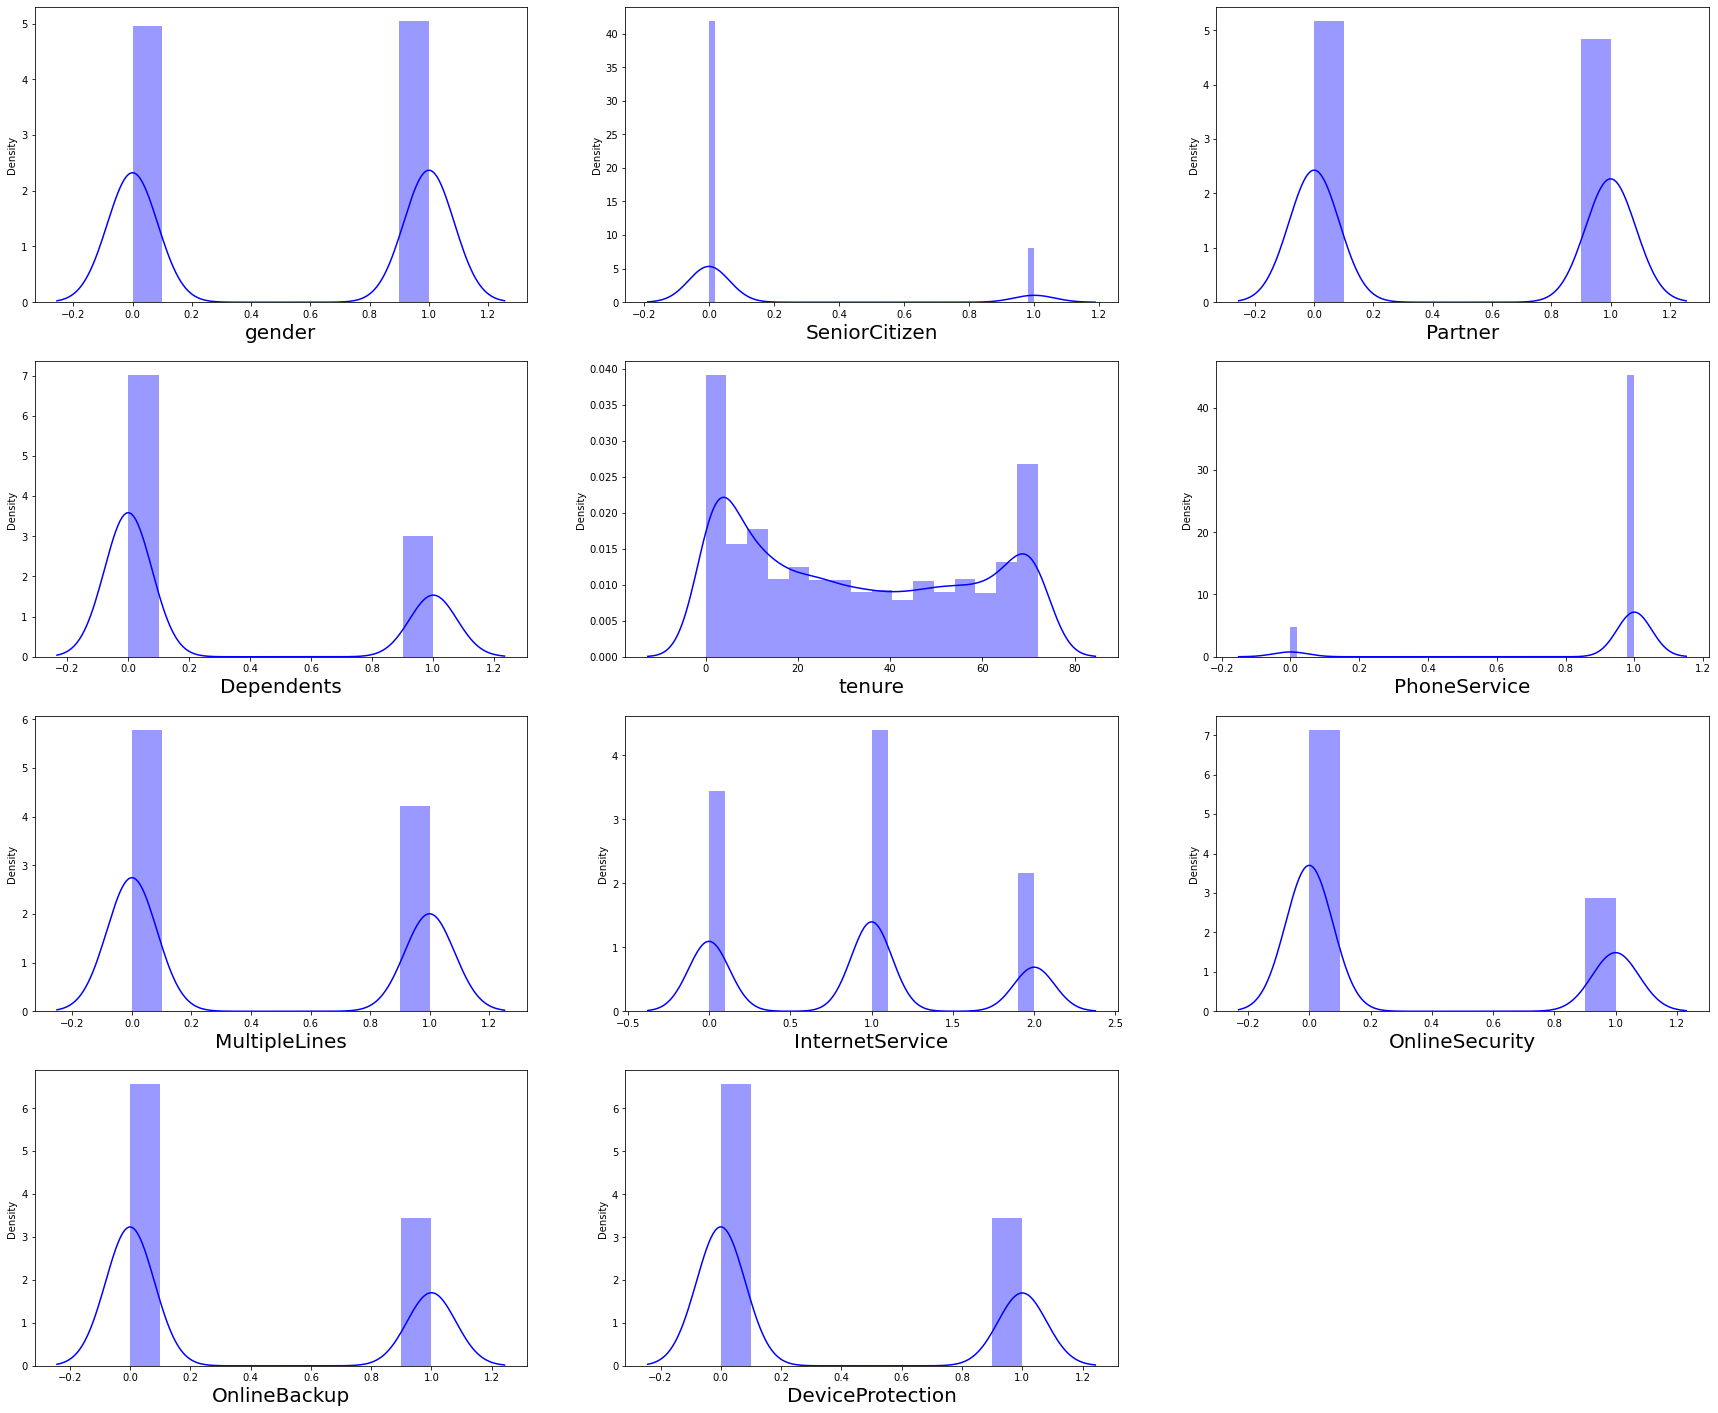

In [14]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=11:
        ax = plt.subplot(4,3,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

The data looks distributed normally so good to continue

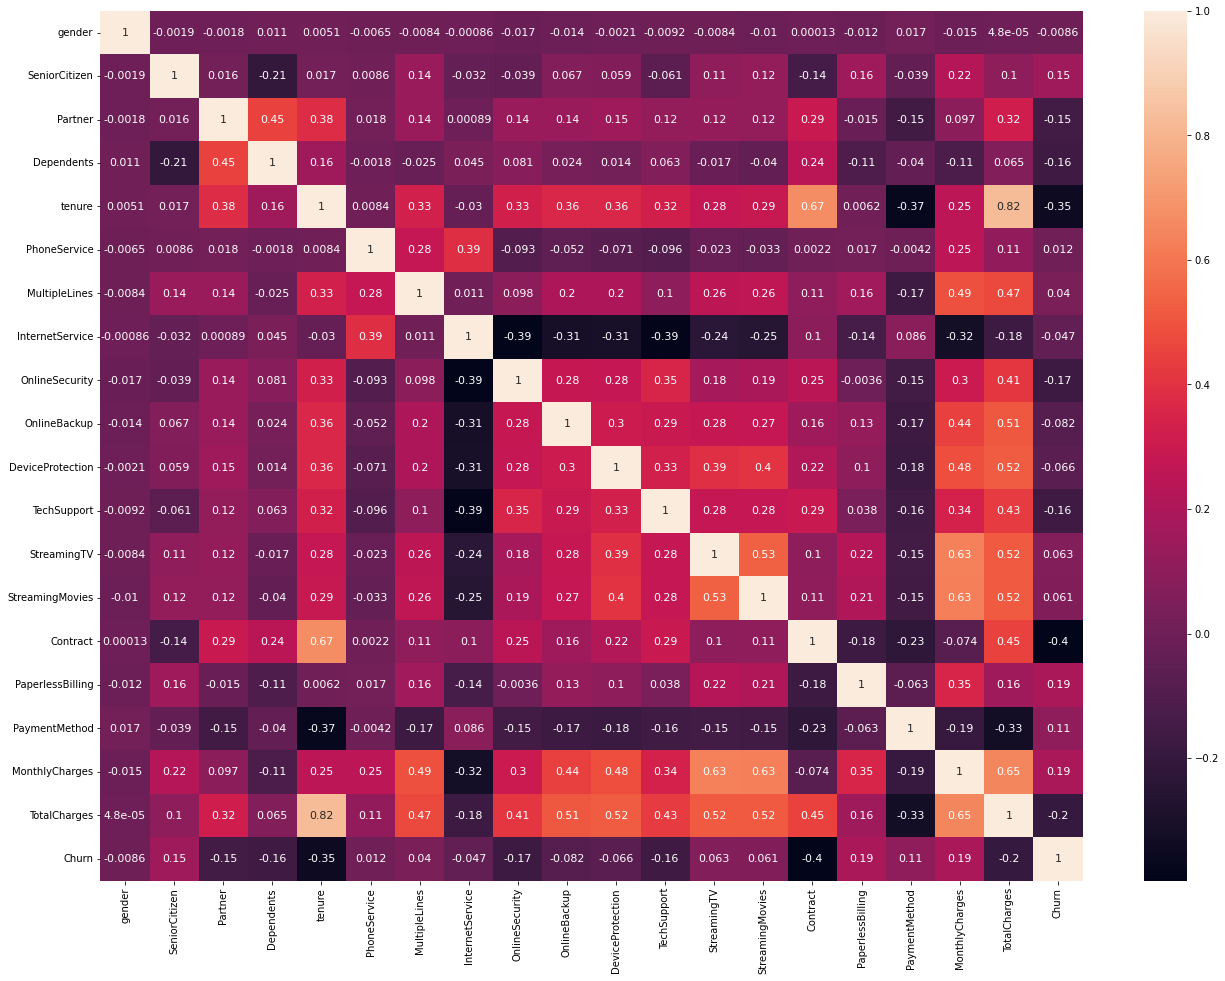

In [15]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':11})
plt.show()

I am not seeing any strong correlation problem

In [16]:
#The features 'tenure','MonthlyCharges','TotalCharges' contains bigger values so let me scale them down
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [17]:
#Separate features and target
x = df.drop('Churn',axis=1)
y = df['Churn']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [19]:
# Model instantiation with default parameters
lr = LogisticRegression()
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1308
           1       0.64      0.54      0.59       453

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



In [20]:
#Let us improve the accuracy using gridsearchcv
params = {'n_jobs':[1,2,3],'penalty':['l1','l2'],'max_iter':range(20,250,10)}
grid_search = GridSearchCV(lr,params,cv=10)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'max_iter': 30, 'n_jobs': 1, 'penalty': 'l2'}

In [21]:
lr = LogisticRegression(n_jobs=1,penalty='l2',max_iter=30)
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1308
           1       0.63      0.54      0.58       453

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



Not able to improve the performance even after hyperparameter tuning

In [22]:
#Check if model is overfitting
print(cross_val_score(lr,x,y,cv=5).mean())

0.8029256927866314


In [23]:
# model instantiation with default parameters
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1308
           1       0.48      0.53      0.51       453

    accuracy                           0.73      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.74      0.73      0.74      1761



In [24]:
params = { 'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(2,8),'min_samples_split':range(3,8)}
grid_search = GridSearchCV(dtc,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 7,
 'min_samples_split': 7}

In [25]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_leaf=7,min_samples_split=4)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1308
           1       0.55      0.55      0.55       453

    accuracy                           0.77      1761
   macro avg       0.69      0.69      0.69      1761
weighted avg       0.77      0.77      0.77      1761



Accuracy improved from 72% to 77% after hyperparameter tuning

In [26]:
#Check if model is overfitting
print(cross_val_score(dtc,x,y,cv=5).mean())

0.758624145106136


In [27]:
# Model instantiation with default parameters
rfc = RandomForestClassifier()
# Train the model
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1308
           1       0.62      0.50      0.56       453

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.79      1761



In [28]:
params = { 'n_estimators':[13,15],'criterion':['gini','entropy'],'max_depth':range(10,20,2),'min_samples_leaf':range(5,20,5),'min_samples_split':range(10,30,5)}
grid_search = GridSearchCV(rfc,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 10,
 'min_samples_split': 25,
 'n_estimators': 15}

In [30]:
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy',max_depth=16,min_samples_leaf=10,min_samples_split=25)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1308
           1       0.65      0.51      0.57       453

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Not able to improve the performance even after hyperparameter tuning

In [31]:
#Check if model is overfitting
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7993759678043745


In [32]:
# Model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1308
           1       0.49      0.49      0.49       453

    accuracy                           0.74      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.74      0.74      0.74      1761



In [33]:
params = { 'algorithm':['kd_tree','brute'],'leaf_size':range(1,14),'n_neighbors':range(3,17,2)}
grid_search = GridSearchCV(knn,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'kd_tree', 'leaf_size': 9, 'n_neighbors': 15}

In [34]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=9,n_neighbors=15)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1308
           1       0.56      0.55      0.55       453

    accuracy                           0.77      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761



Accuracy improved from 74% to 77% after hyperparameter tuning

In [35]:
#Check if model is overfitting
print(cross_val_score(knn,x,y,cv=5).mean())

0.781343251983999


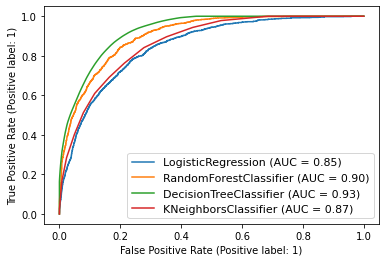

In [36]:
#let me plot roc curve to chose the best model
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dtc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

So based on the accuracy the best fit model is DecisionTreeClassifier

In [37]:
# save the model to disk
filename = 'Customer_Churn_Model.sav'
pickle.dump(dtc, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
data = pd.DataFrame({"Actual":y_test,"Predicted":result})
data

,Actual,Predicted
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
...,...,...
2626,0,0
6574,0,1
6444,1,0
2760,0,0
